# NAME: Shuhan Chen
# Github Username: ShuhanChen00
# USC ID: 8108685279

1. Combined Cycle Power Plant Data Set
The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [19]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx', engine='openpyxl')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


(b) Exploring the data:
i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [20]:
num_rows = df.shape[0]
num_columns = df.shape[1]

print(f'The dataset has {num_rows} rows.')
print(f'The dataset has {num_columns} columns.')
print(f'rows represent the number of samples, columns represent the number of features')

The dataset has 9568 rows.
The dataset has 5 columns.
rows represent the number of samples, columns represent the number of features


ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

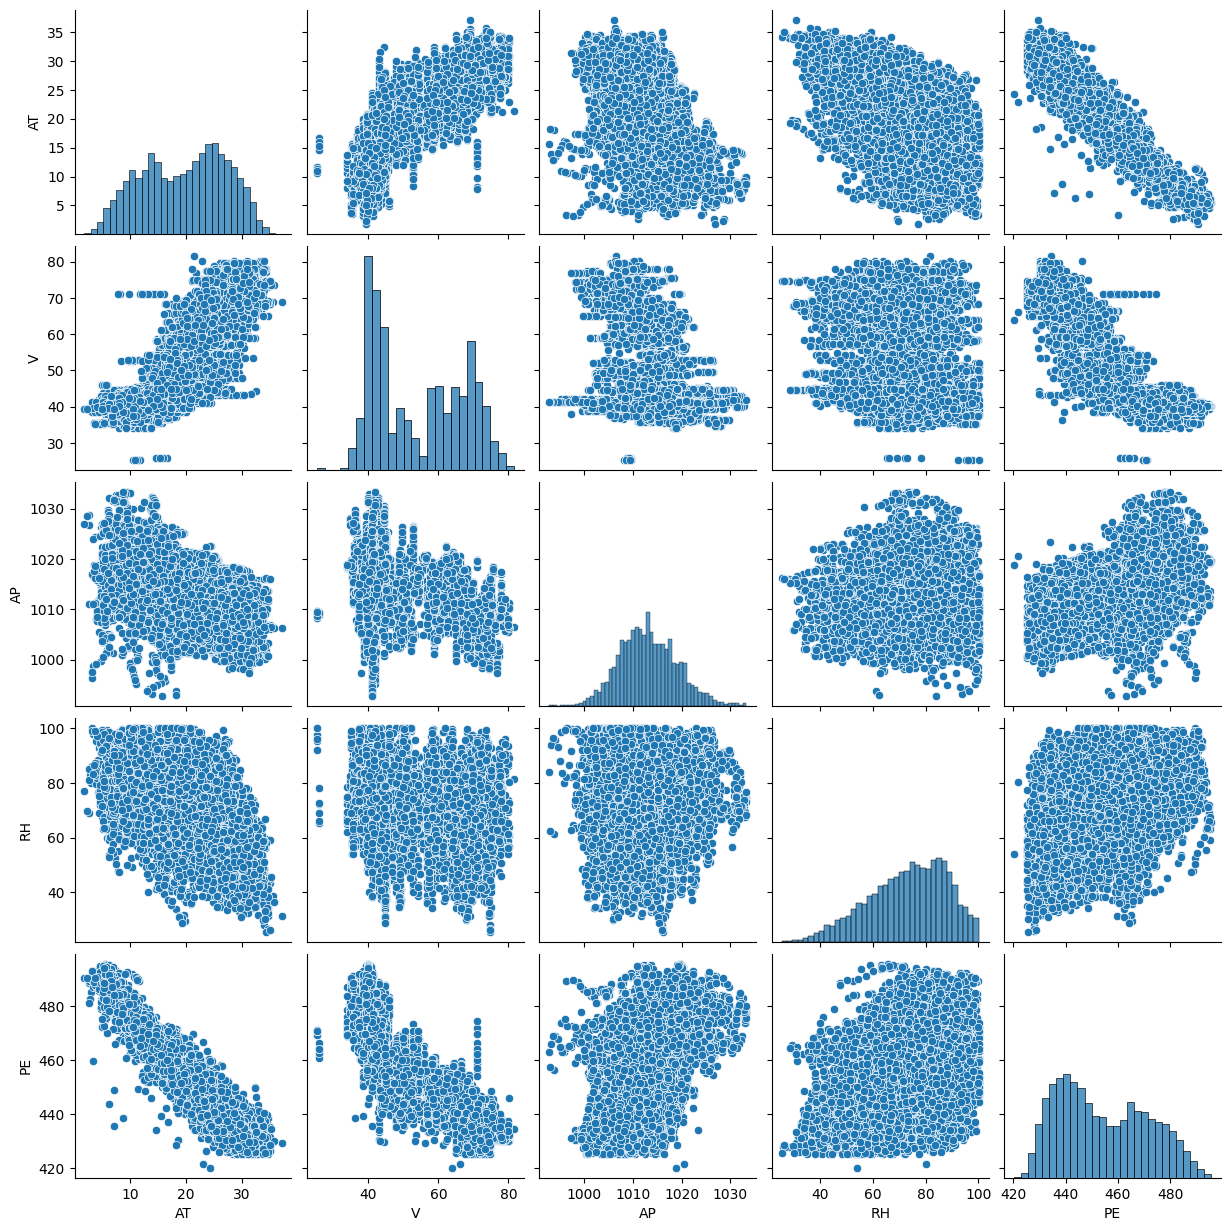

In [21]:
sns.pairplot(df)
plt.show()

AT and PE : plot suggests that as the temperature increases, power output decreases.
V and PE : plot suggests that as the exhaust Vacuum increases, power output decreases.
AP and PE : There's some slight clustering, but no strong correlation between these variables.
RH and PE : There's some slight clustering, but no strong correlation between these variables.
Relationship between AT and PE, V and PE are strong, AP vs PE and RH vs PE appear to show no significant linear relationship.

iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [22]:
summary_stats = df.describe()

range_stats = df.max() - df.min()
summary_stats.loc['range'] = range_stats

IQR = summary_stats.loc['75%'] - summary_stats.loc['25%']
summary_stats.loc['IQR'] = IQR

summary_stats = summary_stats.transpose()

summary_stats[['mean', '50%', 'min', '25%', '75%', 'max', 'range', 'IQR']]

,mean,50%,min,25%,75%,max,range,IQR
AT,19.651231,20.345,1.81,13.5100,25.72,37.11,35.30,12.2100
V,54.305804,52.080,25.36,41.7400,66.54,81.56,56.20,24.8000
AP,1013.259078,1012.940,992.89,1009.1000,1017.26,1033.30,40.41,8.1600
RH,73.308978,74.975,25.56,63.3275,84.83,100.16,74.60,21.5025
PE,454.365009,451.550,420.26,439.7500,468.43,495.76,75.50,28.6800


(c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

Regression Results for AT vs PE:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:19   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.03

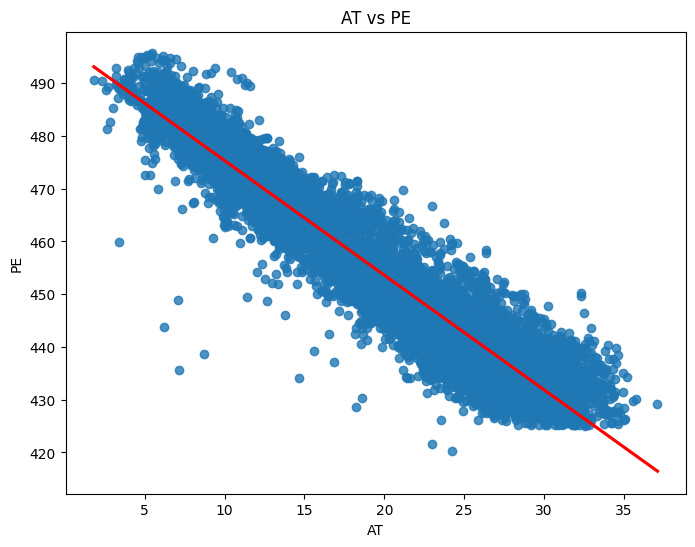

Regression Results for V vs PE:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:20   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.801

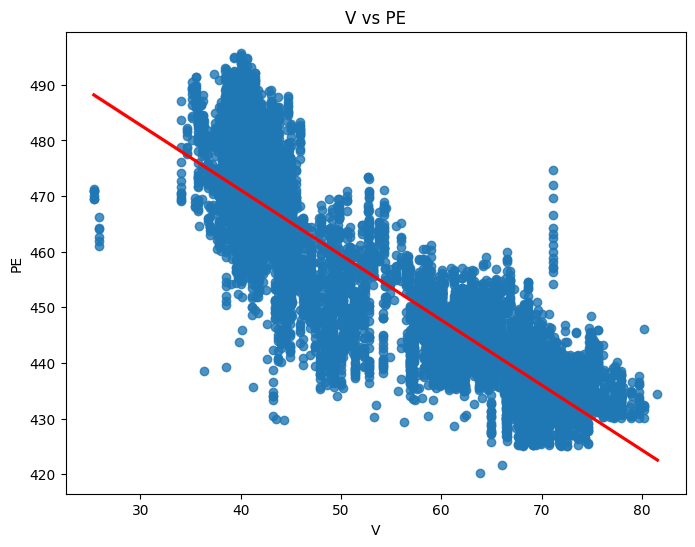

Regression Results for AP vs PE:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:20   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.26

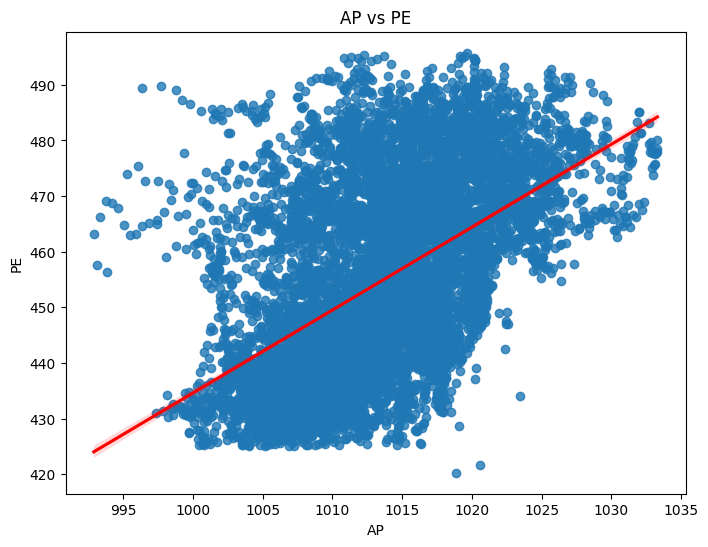

Regression Results for RH vs PE:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:20   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.96

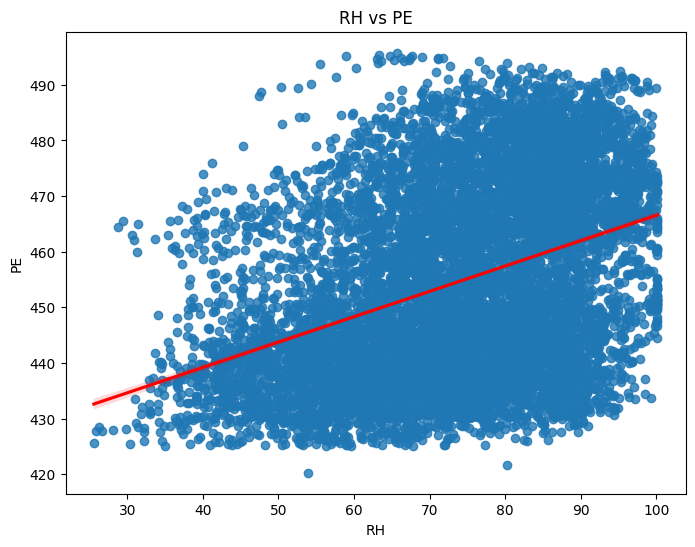

[const    497.03412
AT        -2.17132
dtype: float64, const    517.801526
V         -1.168135
dtype: float64, const   -1055.260989
AP          1.489872
dtype: float64, const    420.961766
RH         0.455650
dtype: float64]


In [23]:
def fit_simple_linear_regression(predictor, response, data):

    X = sm.add_constant(df[predictor])
    y = data[response]
    
    model = sm.OLS(y, X).fit()
    
    print(f"Regression Results for {predictor} vs {response}:")
    print(model.summary())
    
    plt.figure(figsize=(8, 6))
    sns.regplot(x=predictor, y=response, data=data, line_kws={'color': 'red'})
    plt.title(f"{predictor} vs {response}")
    plt.xlabel(predictor)
    plt.ylabel(response)
    plt.show()
    
    return model

predictors = ['AT', 'V', 'AP', 'RH']
response = 'PE'
univariate_coeffs = []

for predictor in predictors:
    model = fit_simple_linear_regression(predictor, response, df)
    univariate_coeffs.append(model.params)

print(univariate_coeffs)

remove outlier(using IQR):

Number of outliers removed for AT: 0
Regression Results for AT vs PE (After Outlier Removal):
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:21   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

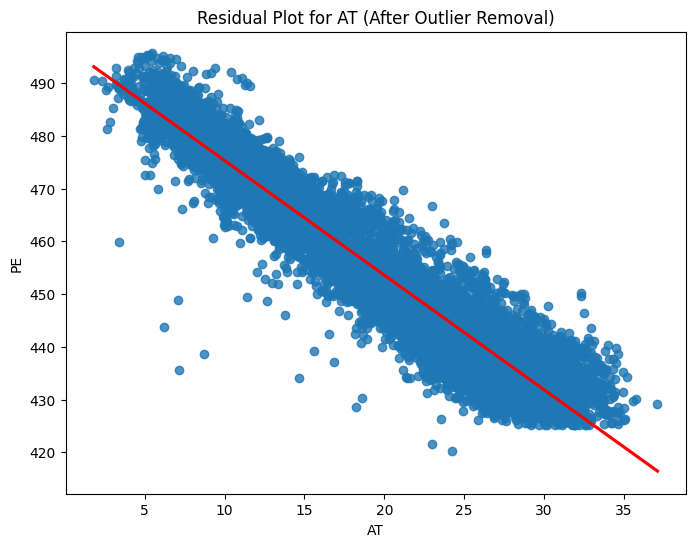

Number of outliers removed for V: 0
Regression Results for V vs PE (After Outlier Removal):
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:21   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

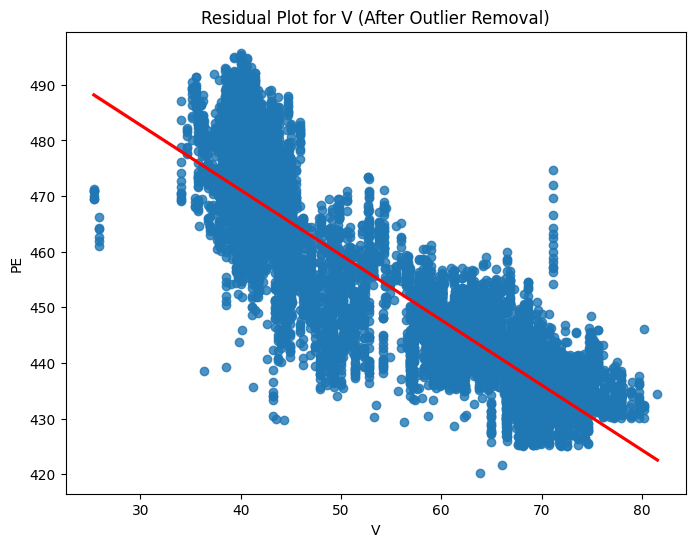

Number of outliers removed for AP: 88
Regression Results for AP vs PE (After Outlier Removal):
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     3532.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:21   Log-Likelihood:                -38829.
No. Observations:                9480   AIC:                         7.766e+04
Df Residuals:                    9478   BIC:                         7.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

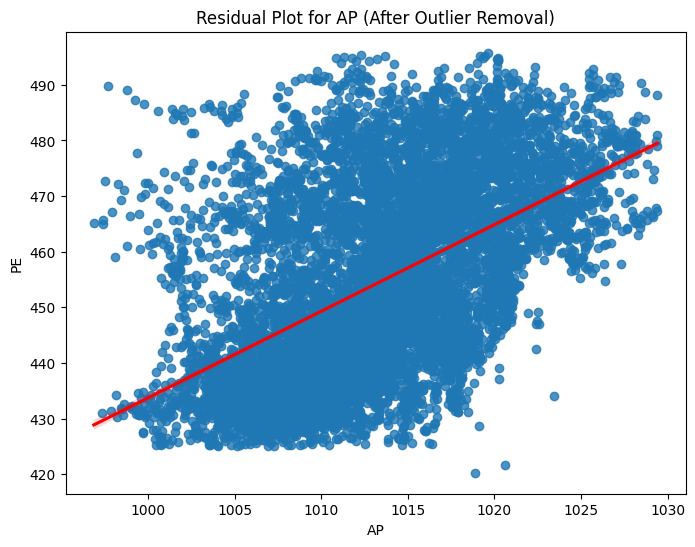

Number of outliers removed for RH: 12
Regression Results for RH vs PE (After Outlier Removal):
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     1705.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:22   Log-Likelihood:                -39882.
No. Observations:                9556   AIC:                         7.977e+04
Df Residuals:                    9554   BIC:                         7.978e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

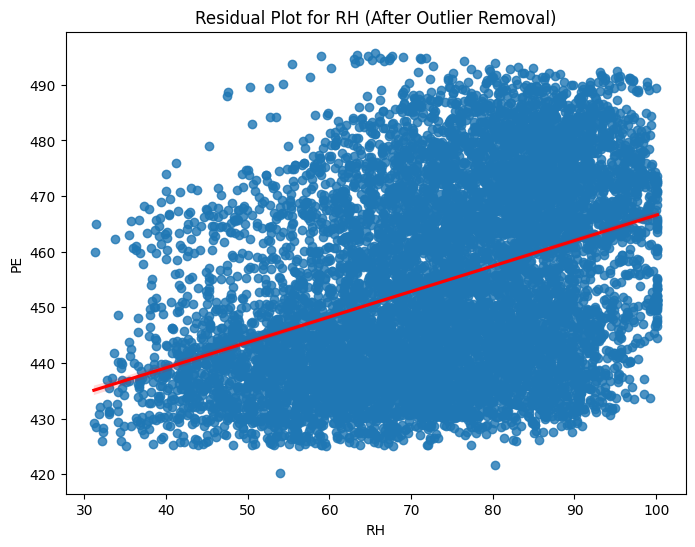

[const    497.03412
AT        -2.17132
dtype: float64, const    517.801526
V         -1.168135
dtype: float64, const   -1122.817500
AP          1.556542
dtype: float64, const    420.844013
RH         0.457153
dtype: float64]


In [24]:
def fit_simple_linear_regression(predictor, response, data):

    Q1 = data[predictor].quantile(0.25)
    Q3 = data[predictor].quantile(0.75)
    IQR = Q3 - Q1

    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    data_no_outliers = data[(data[predictor] >= lower_threshold) & (data[predictor] <= upper_threshold)]
    print(f"Number of outliers removed for {predictor}: {len(data) - len(data_no_outliers)}")

    X = sm.add_constant(data_no_outliers[predictor])
    y = data_no_outliers[response]
    model_no_outliers = sm.OLS(y, X).fit()

    print(f"Regression Results for {predictor} vs {response} (After Outlier Removal):")
    print(model_no_outliers.summary())

    plt.figure(figsize=(8, 6))
    sns.regplot(x=predictor, y=response, data=data_no_outliers, line_kws={'color': 'red'})
    plt.title(f"Residual Plot for {predictor} (After Outlier Removal)")
    plt.xlabel(predictor)
    plt.ylabel(response)
    plt.show()

    return model_no_outliers

univariate_coeffs_no_outliers = []

for predictor in predictors:
    model = fit_simple_linear_regression(predictor, response, df)
    univariate_coeffs_no_outliers.append(model.params)

print(univariate_coeffs_no_outliers)

(d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

In [25]:
X = sm.add_constant(df[['AT', 'V', 'AP', 'RH']])
y = df['PE']
multiple_model = sm.OLS(y, X).fit()
multiple_coeffs = multiple_model.params[1:] 
print (multiple_model.summary())
print (multiple_coeffs)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:22   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

Descriptions:
R-squared: 0.929, meaning 92.9% of the variance in PE is explained by the predictors.
Coefficients and p-values:
AT: Coefficient = -1.9775, p-value = 0.000 → Statistically significant.
V: Coefficient = -0.2339, p-value = 0.000 → Statistically significant.
AP: Coefficient = 0.0621, p-value = 0.000 → Statistically significant.
RH: Coefficient = -0.1581, p-value = 0.000 → Statistically significant.

Null hypothesis H0 :βj =0?
For all predictors (AT, V, AP, RH), the p-values are less than 0.0OO, so we can reject the null hypothesis and conclude that each predictor has a statistically significant relationship with PE.

(e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

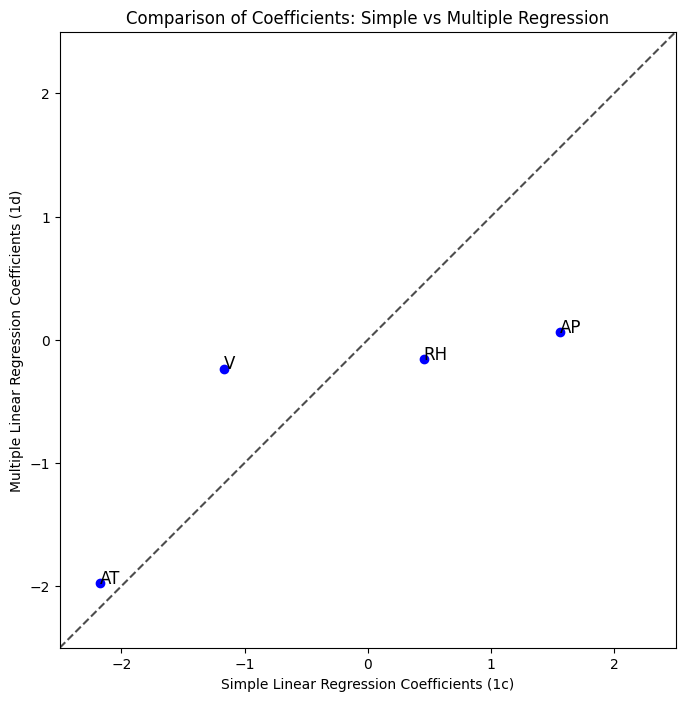

In [26]:
simple_coeffs = {
    'AT': -2.171577,  
    'V': -1.165221,   
    'AP': 1.556542,  
    'RH': 0.454671    
}
multiple_coeffs = {
    'AT': -1.9775,  
    'V': -0.2339,   
    'AP': 0.0621,   
    'RH': -0.1581   
}
coeff_df = pd.DataFrame({
    'Predictor': list(simple_coeffs.keys()),
    'Simple_Coeff': list(simple_coeffs.values()),
    'Multiple_Coeff': list(multiple_coeffs.values())
})

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(coeff_df['Simple_Coeff'], coeff_df['Multiple_Coeff'], color='blue')
for i, row in coeff_df.iterrows():
    plt.text(row['Simple_Coeff'], row['Multiple_Coeff'], row['Predictor'], fontsize=12)

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.gca().set_aspect('equal', adjustable='box')
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

plt.xlabel('Simple Linear Regression Coefficients (1c)')
plt.ylabel('Multiple Linear Regression Coefficients (1d)')
plt.title('Comparison of Coefficients: Simple vs Multiple Regression')
plt.show()

(f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form. Y =β0 +β1X+β2X2 +β3X3 +ε

Polynomial Regression Results for AT vs PE:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:22   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

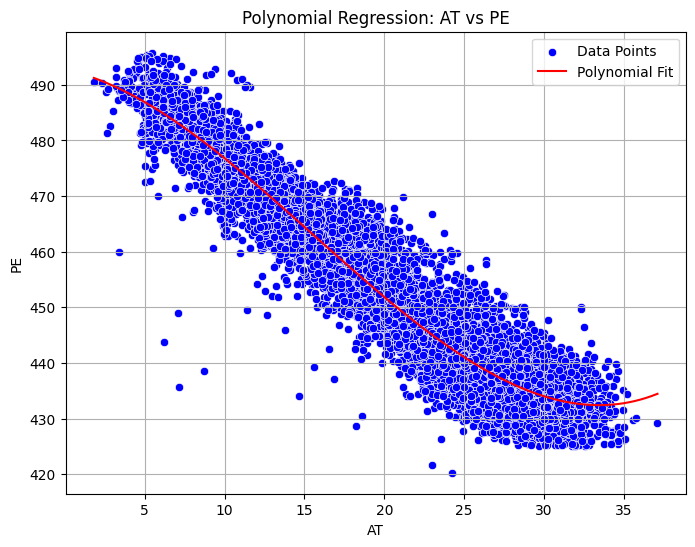

Polynomial Regression Results for V vs PE:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:22   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

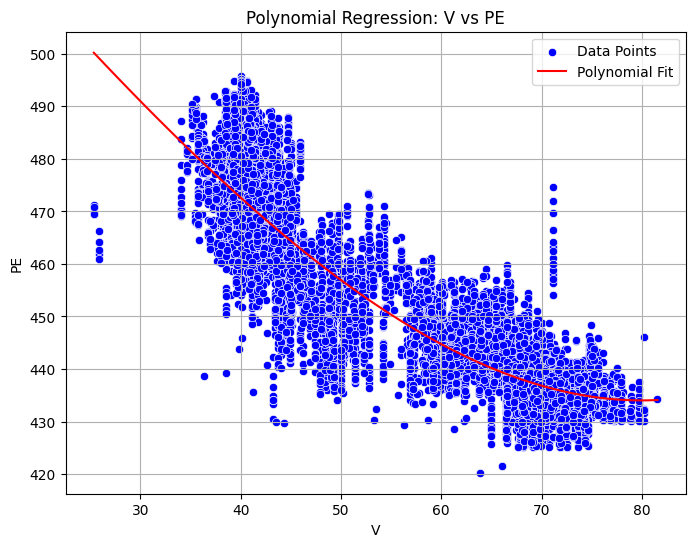

Polynomial Regression Results for AP vs PE:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:22   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

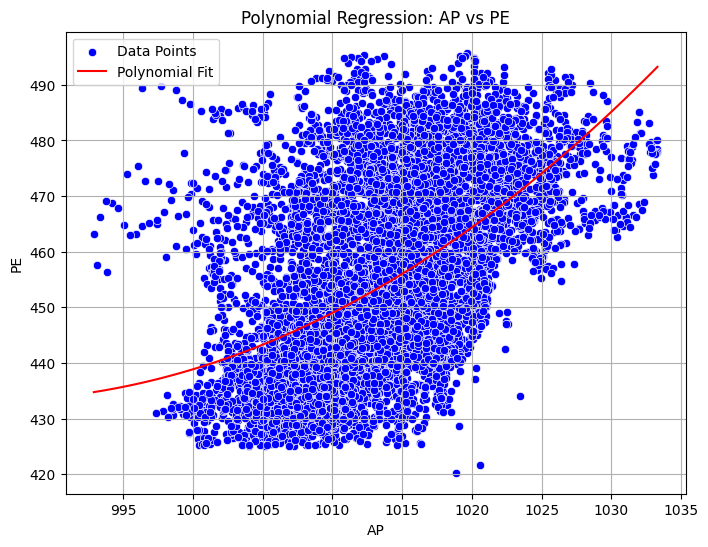

Polynomial Regression Results for RH vs PE:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:22   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

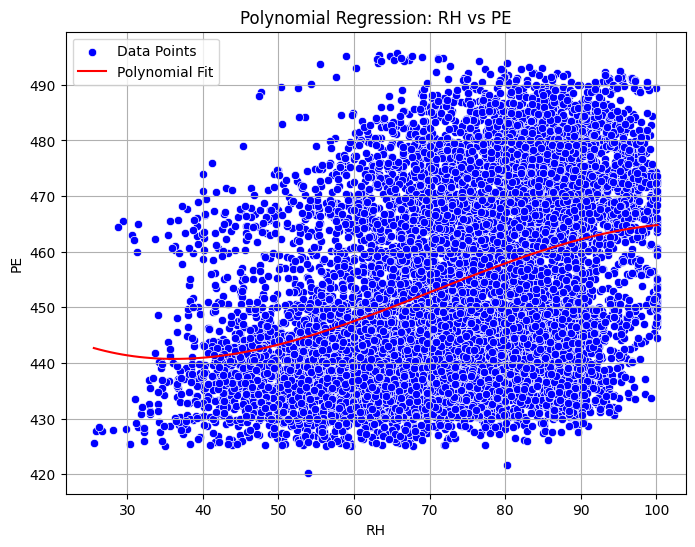

In [27]:
def fit_polynomial_regression(predictor, response, data):
    X = data[predictor]
    X_poly = np.column_stack([X, X**2, X**3])
    X_poly = sm.add_constant(X_poly)
    y = data[response]
    model = sm.OLS(y, X_poly).fit()
    print(f"Polynomial Regression Results for {predictor} vs {response}:")
    print(model.summary())

    p_values = model.pvalues[1:]  
    print(f"P-values for {predictor}: {p_values}")
    if any(p_values < 0.05):
        print(f"Evidence of nonlinear association for {predictor}.")
    else:
        print(f"No evidence of nonlinear association for {predictor}.")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=predictor, y=response, data=data, color='blue', label='Data Points')
    x_values = np.linspace(data[predictor].min(), data[predictor].max(), 100)
    x_poly_values = np.column_stack([x_values, x_values**2, x_values**3])
    x_poly_values = sm.add_constant(x_poly_values)
    y_pred = model.predict(x_poly_values)
    plt.plot(x_values, y_pred, color='red', label='Polynomial Fit')
    plt.title(f"Polynomial Regression: {predictor} vs {response}")
    plt.xlabel(predictor)
    plt.ylabel(response)
    plt.legend()
    plt.grid(True)
    plt.show()

    return model

for predictor in predictors:
    model = fit_polynomial_regression(predictor, response, df) 


(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [28]:
df_interactions = df.copy()

for (predictor1, predictor2) in combinations(predictors, 2):
    df_interactions[f'{predictor1}_x_{predictor2}'] = df_interactions[predictor1] * df_interactions[predictor2]

X = df_interactions[predictors + [f'{predictor1}_x_{predictor2}' for predictor1, predictor2 in combinations(predictors, 2)]]
y = df['PE']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:22   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

V, AP, RH, AT_x_V, AT_x_RH, V_x_AP, AP_x_RH, their corresponding p-value is less than <0.05, statistically significant .

(h) Can you improve your model using possible interaction terms or nonlinear assoiations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [29]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

X_train_1 = sm.add_constant(train_df[predictors])
y_train_1 = train_df[response]
model_1 = sm.OLS(y_train_1, X_train_1).fit()

X_test_1 = sm.add_constant(test_df[predictors])
y_test_1 = test_df[response]
y_pred_1 = model_1.predict(X_test_1)
mse_test_1 = mean_squared_error(y_test_1, y_pred_1)

print("Model 1: Linear Regression with All Predictors")
print(model_1.summary())
print(f"Test MSE for Model 1: {mse_test_1}")

Model 1: Linear Regression with All Predictors
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:22   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

In [30]:
interaction_terms = []
quadratic_terms = []
for pred1, pred2 in combinations(predictors, 2):
    interaction_term = f'{pred1}:{pred2}'
    train_df[interaction_term] = train_df[pred1] * train_df[pred2]
    test_df[interaction_term] = test_df[pred1] * test_df[pred2]
    interaction_terms.append(interaction_term)

for pred in predictors:
    quadratic_term = f'{pred}^2'
    train_df[quadratic_term] = train_df[pred] ** 2
    test_df[quadratic_term] = test_df[pred] ** 2
    quadratic_terms.append(quadratic_term)

X_train_2 = sm.add_constant(train_df[predictors + interaction_terms + quadratic_terms])
y_train_2 = train_df[response]
model_2_full = sm.OLS(y_train_2, X_train_2).fit() 

significant_vars = model_2_full.pvalues[model_2_full.pvalues < 0.05].index
X_train_2_reduced = X_train_2[significant_vars]
model_2_reduced = sm.OLS(y_train_2, X_train_2_reduced).fit()

X_test_2 = sm.add_constant(test_df[predictors + interaction_terms + quadratic_terms])
X_test_2_reduced = X_test_2[significant_vars]
y_test_2 = test_df[response]
y_pred_2 = model_2_reduced.predict(X_test_2_reduced)
mse_test_2 = mean_squared_error(y_test_2, y_pred_2)

print("\nModel 2: Regression with Interaction Terms and Quadratic Terms (Reduced)")
print(model_2_reduced.summary())
print(f"Test MSE for Model 2: {mse_test_2}")


Model 2: Regression with Interaction Terms and Quadratic Terms (Reduced)
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.095e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:45:22   Log-Likelihood:                -19265.
No. Observations:                6697   AIC:                         3.855e+04
Df Residuals:                    6687   BIC:                         3.862e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [31]:
mse_train_1 = mean_squared_error(y_train_1, model_1.predict(X_train_1))
mse_train_2 = mean_squared_error(y_train_2, model_2_reduced.predict(X_train_2_reduced))

print("\nComparison of Models:")
print(f"Model 1 - Train MSE: {mse_train_1}, Test MSE: {mse_test_1}")
print(f"Model 2 - Train MSE: {mse_train_2}, Test MSE: {mse_test_2}")


Comparison of Models:
Model 1 - Train MSE: 20.580839725738695, Test MSE: 21.239856938225454
Model 2 - Train MSE: 18.457177417725564, Test MSE: 19.221018954934152



(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[response], test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

train_errors_raw = []
test_errors_raw = []
train_errors_normalized = []
test_errors_normalized = []
k_values = range(1, 101)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    train_errors_raw.append(mean_squared_error(y_train, y_train_pred))
    test_errors_raw.append(mean_squared_error(y_test, y_test_pred))

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_normalized, y_train)
    y_train_pred = knn.predict(X_train_normalized)
    y_test_pred = knn.predict(X_test_normalized)
    train_errors_normalized.append(mean_squared_error(y_train, y_train_pred))
    test_errors_normalized.append(mean_squared_error(y_test, y_test_pred))

best_k_raw = np.argmin(test_errors_raw) + 1
best_k_normalized = np.argmin(test_errors_normalized) + 1

print(f"Minimum test MSE for raw features:{min(test_errors_raw)}")
print(f"Best k for raw features: {best_k_raw}")
print(f"Minimum test MSE with normalized features:{min(test_errors_normalized)}")
print(f"Best k for normalized features: {best_k_normalized}")

Minimum test MSE for raw features:15.726819842563568
Best k for raw features: 5
Minimum test MSE with normalized features:14.305669422675024
Best k for normalized features: 4


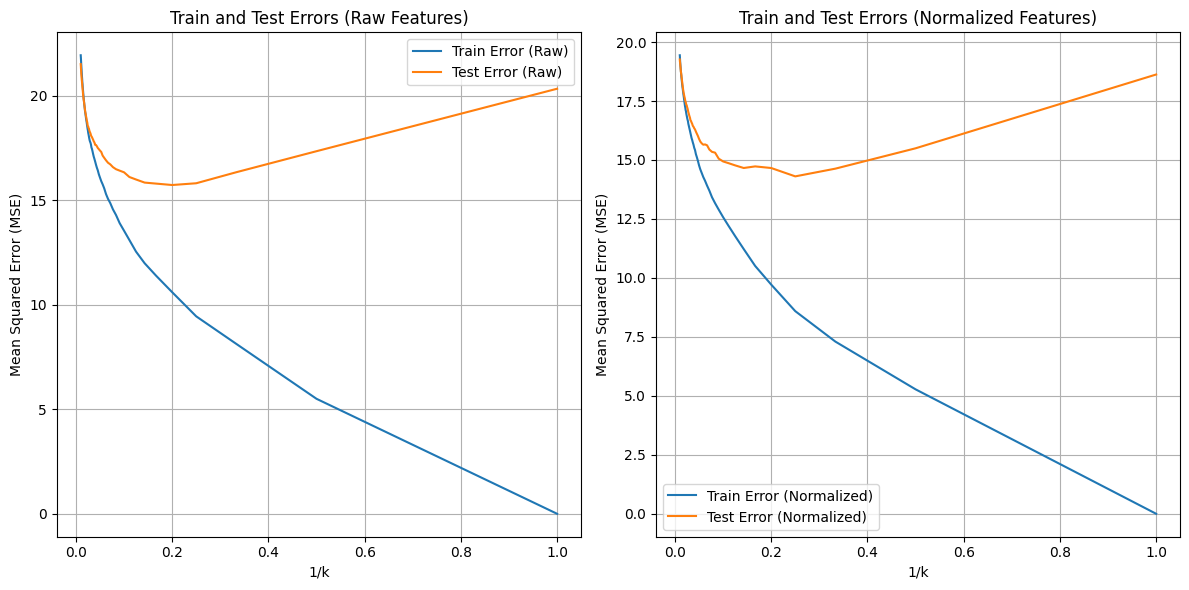

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(1 / np.array(k_values), train_errors_raw, label='Train Error (Raw)')
plt.plot(1 / np.array(k_values), test_errors_raw, label='Test Error (Raw)')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train and Test Errors (Raw Features)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(1 / np.array(k_values), train_errors_normalized, label='Train Error (Normalized)')
plt.plot(1 / np.array(k_values), test_errors_normalized, label='Test Error (Normalized)')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train and Test Errors (Normalized Features)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

(j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

Test MSE for each model:
Linear Regression without interaction : 21.239856938225454
Linear Regression with interaction : 19.221018954934152
KNN Regression for raw features	: 15.726819842563568
KNN Regression for Normalized Features	: 14.305669422675024
Among all KNN Regression for Normalized Features has the smallest test error therefore it has the best performance. Overall, Knn Regressions have better performance than Linear Regressions.

2. ISLR: 2.4.1
1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
(a) The sample size n is extremely large, and the number of predictors p is small.

Better. The performance is evaluated based on bias-variance tradeoff, interpretability, and computational efficiency. With large n, a flexible learning method is more unlikely to be overfittng. With small p, it could be more flexible to fit the model.

(b) The number of predictors p is extremely large, and the number of observations n is small.
Worse. With large n and small p, flexible models are more likely to be overfitting, may capture noise than underlying features. Plus, large p might need more cost to compute the model.

(c) The relationship between the predictors and response is highly non-linear.
Better. Flexible methods can model complex, nonlinear relationships effectively.

(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.
Worse.  Inflexible methods are less sensitive to noise and less likely to overfit.

3. ISLR: 2.4.7
The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Obs. X1 X2 X3 Y
1   0   3   0  Red
2   2   0   0  Red
3   0   1   3  Red
4   0   1   2  Green 
5   −1  0   1  Green 
6   1   1   1  Red
Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

(a) Compute the Euclidean distance between each observation and the test point,X1 =X2 =X3 =0.
d1 = (0^2+3^2+0^2)^1/2 = 3
d2 = 2
d3 = (10)^1/2
d4 = (5)^1/2
d5 = (2)^1/2
d6 = (3)^1/2

(b) What is our prediction with K = 1? Why?
GREEN. it's the closest distance

(c) What is our prediction with K = 3? Why?
GREEN. In the closest 3 distances, two of them are green

(d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?
a smaller K value. the model will be more flexible and the decision boundary will be more non-linear.

REFERENCE:
REMOVE OUTLIERS: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
POLYNOMIAL REGRESSION: https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/